In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import os 
sns.set()

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# https://abdalimran.github.io/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot

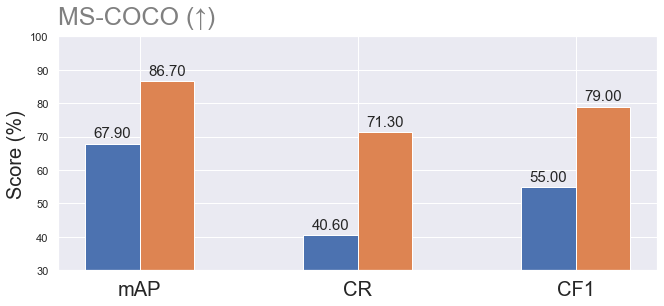

In [26]:
#labels = ['Baseline', 'MaskSup']
labels = ['mAP', 'CR', 'CF1']

# VOC
auc = [67.9, 40.6, 55.0] # base
acc_nst = [86.7, 71.3, 79.0]

# COCO
# auc = [54.2,36.0,48.4] # base
# acc_nst = [74.8,59.4,68.8]



# polyp - CVC-ClinicDB
# auc = [69.737,81.385] # base
# acc_nst = [72.513,82.444] # cb
# acc = [73.599, 84.022] # cb ts

# NYU
# auc = [33.602,34.742] # base
# acc_nst = [38.261,39.118] # cb
# acc = [38.535,39.313] # cb ts


x = np.arange(len(labels))  # the label locations
dummy = np.arange(10)

width = 0.25 #0.4  # the width of the bars



fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, auc, width, label='Baseline')
rects2 = ax.bar(x + width/2, acc_nst, width, label='MaskSup')
#rects211 = ax.bar(x + width/2 * 3.08, acc, width, label='CF1')

ax.set_ylabel('Score (%)', fontsize=20)
#ax.set_title('Results')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=0, fontsize=20)

#for i in range(18):
#    ax.get_xticklabels()[i].set_color("white")

# Scne
#ax.set_ylim([30, 44])
# polyp
#ax.set_ylim([65,90])
# Glas
ax.set_ylim([30,100])

#ax.legend(loc="upper left", prop={'size': 14})
ax.grid(True)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=0, fontsize=15)
        #ax.set_ylim(ymin=1)
        

def autolabel_(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=0, fontsize=15)
        #ax.set_ylim(ymin=1)


autolabel(rects1) # %
autolabel(rects2)
#autolabel_(rects211) # %

fig.tight_layout()
fig.set_size_inches(10, 4, forward=True)
plt.title('MS-COCO (\u2191)', loc='left', fontsize=25, color='gray', pad=12)
#plt.legend(loc='upper right', fontsize=18)
plt.savefig("../logs/robustness_voc.pdf", bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()